In [1]:
import RF_utils as rfut
from RF_feature_importance import evaluate_model_with_shap, evaluate_feature_with_shap  # Assuming SHAP evaluation is defined here
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.inspection import plot_partial_dependence
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import pandas as pd

# Load your data (modify this part with real data loading)
csv_fn = r"Y:\ATD\GIS\East_Troublesome\Watershed Statistical Analysis\Watershed Stats\Hillslopes\Stream Clipped Hillslopes Pruned\Hillslope_Stats_Combined 050224.csv"
variables_to_exclude_base = ['ID', 'Erosion mean', "Category",	"OBJECTID", "Deposition mean",	"Deposition stdev",	"Erosion stdev", "Watershed",
                    "Deposition mean Masked",	"Deposition stdev Masked",	"Erosion mean Masked",	"Erosion stdev Masked", 'Erosion Volsum Masked',	
                    'Erosion Volsum Masked Count',	'Erosion Volsum over count', 'Deposition Volsum Masked',	'Deposition Volsum Masked Count',  
                    #'perimeter', "width", "length", "area",
                    #"Curvature", "width_over_length",  "Mulch Coverage %",
                    #"Aspect Mean", "Aspect std",   "dummy", "% Bare Earth",
                    #"Slope Mean", "Slope std",  "Max Int 60 min", "Accumulated Precipitation",
                    #"Terrain Ruggedness Index", "Flow Accumulation", "dNBR Mean",
                    ] #

variables_to_exclude_1 = [
                    'perimeter', "width", "length", "area",
                    "Curvature", "width_over_length",  "Mulch Coverage %",
                    #"Aspect Mean", "Aspect std",   "dummy", "% Bare Earth",
                    #"Slope Mean", "Slope std",  "Max Int 60 min", "Accumulated Precipitation",
                    #"Terrain Ruggedness Index", "Flow Accumulation", "dNBR Mean",
                    ] #

variables_to_exclude_2 = [
                    'perimeter', "width", "length", "area",
                    "Curvature", "width_over_length",  "Mulch Coverage %",
                    "Aspect Mean", "Aspect std",   "dummy", 
                    #"Slope Mean", "Slope std",  "Max Int 60 min", "Accumulated Precipitation", "% Bare Earth",
                    #"Terrain Ruggedness Index", "Flow Accumulation", "dNBR Mean",
                    ] #

variables_to_exclude_3 = [ 
                    'perimeter', "width", "length", "area",
                    "Curvature", "width_over_length",  "Mulch Coverage %",
                    "Aspect Mean", "Aspect std",   "dummy", "% Bare Earth",
                    #"Slope Mean", "Slope std",  "Max Int 60 min", "Accumulated Precipitation", 
                    #"Terrain Ruggedness Index", "Flow Accumulation", "dNBR Mean",
                    ] #

variables_to_exclude_4 = [ 
                    'perimeter', "width", "length", "area",
                    "Curvature", "width_over_length",  "Mulch Coverage %",
                    "Aspect Mean", "Aspect std",   "dummy", 
                    #"Slope Mean", "Slope std",  "Max Int 60 min", "Accumulated Precipitation", "% Bare Earth",
                    "Terrain Ruggedness Index", "Flow Accumulation", "dNBR Mean",
                    ] #

variables_to_exclude_5 = [ 
                    'perimeter', "width", "length", "area",
                    "Curvature", "width_over_length",  "Mulch Coverage %",
                    "Aspect Mean", "Aspect std",   "dummy", 
                    #"Slope Mean", "Slope std",  "Max Int 60 min", "Accumulated Precipitation", "% Bare Earth", "Flow Accumulation"
                    "Terrain Ruggedness Index", "dNBR Mean",
                    ] #

variables_to_exclude_6 = [ 
                    'perimeter', "width", "length", "area",
                    "Curvature", "width_over_length",  "Mulch Coverage %",
                    "Aspect Mean", "Aspect std",   "dummy", 
                    #"Slope Mean", "Slope std",   "Accumulated Precipitation", "% Bare Earth", "Flow Accumulation"
                    "Terrain Ruggedness Index", "dNBR Mean", "Max Int 60 min",
                    ] #

variable_exclusion_matrix = [variables_to_exclude_base + variables_to_exclude_1, variables_to_exclude_base + variables_to_exclude_2, 
                             variables_to_exclude_base + variables_to_exclude_3, variables_to_exclude_base + variables_to_exclude_4, 
                             variables_to_exclude_base + variables_to_exclude_5]

y_field = 'Erosion Volsum over count'
watershed_values = None

def load_data(file_path, exclude_vars, y_var):
    data = pd.read_csv(file_path)
    #drop rows where Erosion Volsum Masked Count is less than 10
    data = data[data['Erosion Volsum Masked Count'] >= 1]
    X = data.drop(columns=exclude_vars)
    y = data[y_var].dropna()
    #drop rows where y contains NaN
    y = y.dropna()
    X = X.loc[y.index]
    X = pd.get_dummies(X)  # Convert categorical columns to dummy variables
    return X, y

def recursive_feature_elimination(X, y, n_features_to_select=10):
    """
    Perform Recursive Feature Elimination (RFE) using a Random Forest classifier.
    
    Args:
    X (DataFrame): The feature set.
    y (Series): The target variable.
    n_features_to_select (int): The number of features to select.
    
    Returns:
    DataFrame: A DataFrame with feature rankings (1 is most important).
    """
    # Define the model
    rf_model = RandomForestRegressor()

    # Create the RFE model and select attributes
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    rfe = rfe.fit(X, y)
    
    # Summarize the selection of the attributes
    feature_ranking = pd.DataFrame({'Feature': X.columns, 
                                    'Ranking': rfe.ranking_})
    
    return feature_ranking.sort_values('Ranking')




Excluding variables: ['ID', 'Erosion mean', 'Category', 'OBJECTID', 'Deposition mean', 'Deposition stdev', 'Erosion stdev', 'Watershed', 'Deposition mean Masked', 'Deposition stdev Masked', 'Erosion mean Masked', 'Erosion stdev Masked', 'Erosion Volsum Masked', 'Erosion Volsum Masked Count', 'Erosion Volsum over count', 'Deposition Volsum Masked', 'Deposition Volsum Masked Count', 'perimeter', 'width', 'length', 'area', 'Curvature', 'width_over_length', 'Mulch Coverage %']


Mean Squared Error: 0.056529513114854955
R^2: 0.5210594280281498
Mean Squared Error: 0.13087891879809418
R^2: 0.13707750189977758
Mean Squared Error: 0.04003296910327825
R^2: 0.22261022395891988
Mean Squared Error: 0.1011672301170887
R^2: 0.06825379124291774
Mean Squared Error: 0.037081994741975294
R^2: 0.47553657919523756
Mean Squared Error: 0.05307215635483048
R^2: 0.5043979205999476
Mean Squared Error: 0.10774967122927177
R^2: 0.22229531327317054
Mean Squared Error: 0.04425716364981182
R^2: 0.3220091153571753
Me

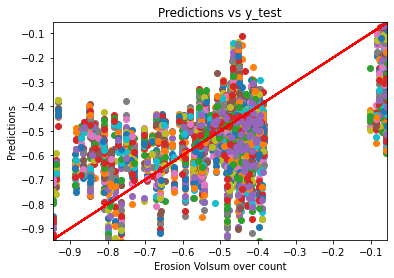

In [2]:
evaluation_results = {}
counter = 1
for variables_to_exclude in variable_exclusion_matrix:
    print(f"Excluding variables: {variables_to_exclude}")
    print("\n")
    # Load and prepare data
    X, y = load_data(csv_fn, variables_to_exclude, y_field)

#get log transform of X and y
#create a new column in X called dummy that is random noise
# Split the data into training and test sets
#rfut.tune_and_evaluate_model(X,y)

    R2_list = []
    mse_list = []
    top_features_dict_RE = {}
    top_features_dict_SHAP = {}
    for i in range(15):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

        # Train the model
        model = RandomForestRegressor(n_estimators=350, max_depth=18, min_samples_split=5)
        model.fit(X_train, y_train)
        #print(f"Mean of {y_field}: {y_test.mean()}")
        #print(f"Standard Deviation of {y_field}: {y_test.std()}")
        mse, predictions = rfut.evaluate_model(model, X_test, y_test)
        # Evaluate the model with SHAP
        #evaluate_model_with_shap(model, X_train, X_test)

        #make a data frame from y_test and predictions
        df = pd.DataFrame(y_test)
        #name the column y_field
        df[y_field] = y_test
        df['predictions'] = predictions
        #plot the predictions vs y_test so x and y are the same

        #get the correlation between the predictions and y_test
        correlation = df[y_field].corr(df['predictions'])
        print(f"R^2: {correlation**2}")
        R2_list.append(correlation**2)
        mse_list.append(mse)
        # print(f"Number of training samples: {len(y_train)}")
        # print(f"Number of testing samples: {len(y_test)}")

        plt.scatter(df[y_field], df['predictions'])
        plt.xlabel(y_field)
        plt.ylabel('Predictions')
        #set axis to be the same bounds
        plt.xlim(min(df[y_field]), max(df[y_field]))
        plt.ylim(min(df[y_field]), max(df[y_field]))
        #plot a perfect correlation line
        plt.plot([min(df[y_field]), max(df[y_field])], [min(df[y_field]), max(df[y_field])], color='red')
        plt.title('Predictions vs y_test')
        # plt.show()
        features_dict = recursive_feature_elimination(X, y, n_features_to_select=5)

        
        for position, feature in enumerate(features_dict['Feature'], start=1):
            score = 10 / position
            top_features_dict_RE[feature] = top_features_dict_RE.get(feature, 0) + score
        
        feature_importance, _ = evaluate_model_with_shap(model, X_train, X_test, plot=False)

        
        for position, feature in enumerate(feature_importance['Feature'], start=1):
            score = 10 / position
            top_features_dict_SHAP[feature] = top_features_dict_SHAP.get(feature, 0) + score

 
    print(f"\nMean R2: {np.mean(R2_list)}")
    print(f"Mean MSE: {np.mean(mse_list)}")
    #check which features show up the most in the top 3
    print(f"Top features from Recursive Elimination:\n {top_features_dict_RE}")
    print(f"Top features from SHAP:\n {top_features_dict_SHAP}")
    evaluation_results[counter] = {'R2': np.mean(R2_list), 'MSE': np.mean(mse_list), 'RE': top_features_dict_RE, 'SHAP': top_features_dict_SHAP}
    counter += 1
    
for key in evaluation_results:
    print(f"\nResults for iteration {key}")
    print(f'R^2 = {evaluation_results[key]["R2"]}')
    print(f'MSE = {evaluation_results[key]["MSE"]}')
    print(f'Top features from Recursive Elimination: {evaluation_results[key]["RE"]}')
    print(f'Top features from SHAP: {evaluation_results[key]["SHAP"]}')

{1: {'R2': 0.2837834108211963, 'MSE': 0.06733561926597507, 'RE': {'Slope std': 150.0, '% Bare Earth': 75.0, 'Terrain Ruggedness Index': 50.00000000000001, 'Accumulated Precipitation': 37.5, 'Flow Accumulation': 30.0, 'Aspect std': 24.761904761904766, 'dNBR Mean': 21.666666666666664, 'Slope Mean': 18.47222222222222, 'dummy': 16.833333333333332, 'Aspect Mean': 14.929292929292929, 'Max Int 60 min': 13.818181818181813}, 'SHAP': {'Accumulated Precipitation': 101.99999999999999, 'Slope std': 102.5, '% Bare Earth': 62.50000000000001, 'Flow Accumulation': 32.66666666666667, 'dNBR Mean': 22.246031746031747, 'Max Int 60 min': 20.2027417027417, 'Terrain Ruggedness Index': 40.345238095238095, 'Slope Mean': 17.50180375180375, 'dummy': 15.696248196248195, 'Aspect std': 17.36111111111111, 'Aspect Mean': 19.961760461760456}}, 2: {'R2': 0.34522602377496603, 'MSE': 0.045012877381572294, 'RE': {'Slope std': 150.0, '% Bare Earth': 75.0, 'Terrain Ruggedness Index': 50.00000000000001, 'Accumulated Precipita

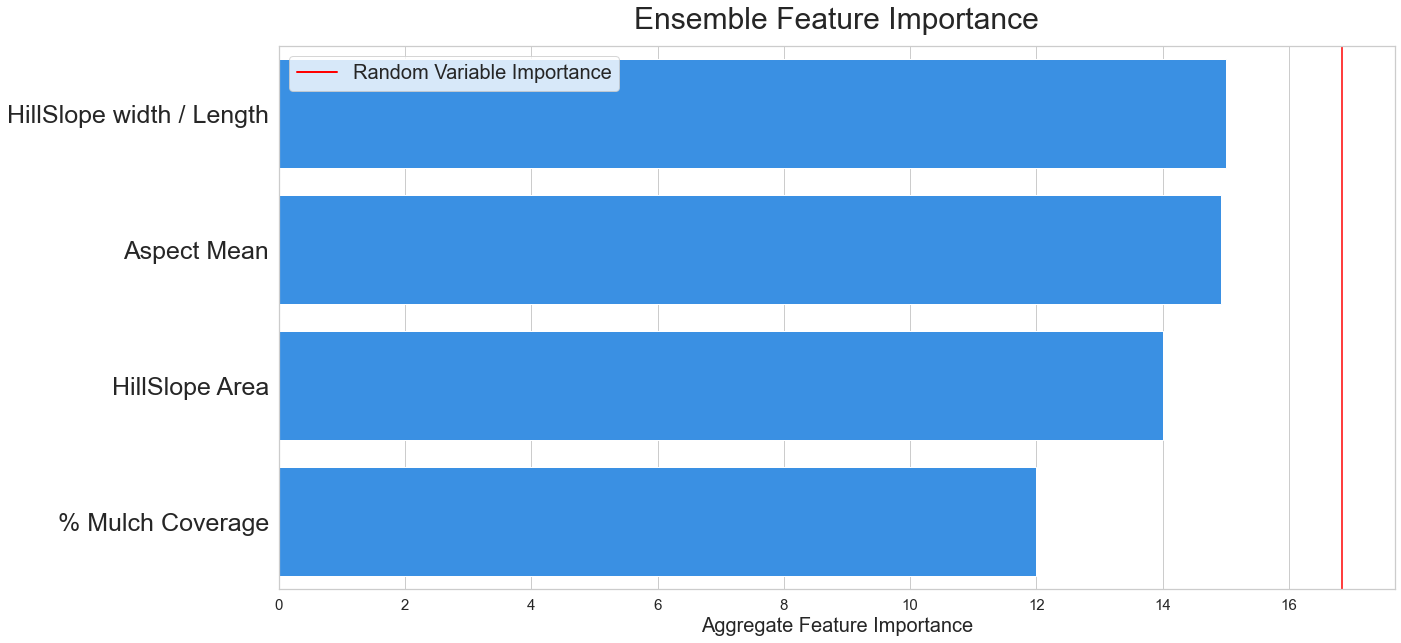

6


In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize empty DataFrames
RE_df = pd.DataFrame()
SHAP_df = pd.DataFrame()

# Add the results to the dataframes
for key in evaluation_results:
    RE_df = pd.concat([RE_df, pd.DataFrame(evaluation_results[key]['RE'], index=[key])])
    SHAP_df = pd.concat([SHAP_df, pd.DataFrame(evaluation_results[key]['SHAP'], index=[key])])
    
print(evaluation_results)
# Combine the dataframes by index
combined_df = RE_df.combine_first(SHAP_df)

# Calculate the mean across the rows for each column
mean_values = combined_df.mean()

mean_values['% Mulch Coverage'] = 12
mean_values['HillSlope width / Length'] = 15
mean_values['HillSlope Area'] = 14
# sort the values
mean_values = mean_values.sort_values(ascending=False)
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a horizontal bar plot with Seaborn
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=mean_values[10:15], y=mean_values.index[10:15], color='dodgerblue')  # Professional blue color for bars

# Set the title with an increased font size and adjust positioning
ax.set_title('Ensemble Feature Importance', fontsize=30, y=1.02)

# Set the x-axis label with a larger font size (now represents the feature importance)
ax.set_xlabel('Aggregate Feature Importance', fontsize=20)

# Customize the font size of the tick labels
ax.tick_params(axis='x', labelsize=15)  # x-axis now has the values
ax.tick_params(axis='y', labelsize=25)  # y-axis now has the feature names

# Plot a vertical red line at the value of 'dummy' (since the axes are flipped)
line = plt.axvline(x=mean_values['dummy'], color='red', linestyle='-')  # Red color for the line


red_line = mlines.Line2D([], [], color='red', label='Random Variable Importance', linewidth=2)

# Add a legend with a specified font size
plt.legend(handles=[red_line], fontsize=20, frameon=True, facecolor='white')

# Show the plot
plt.show()


print(len(X.columns))


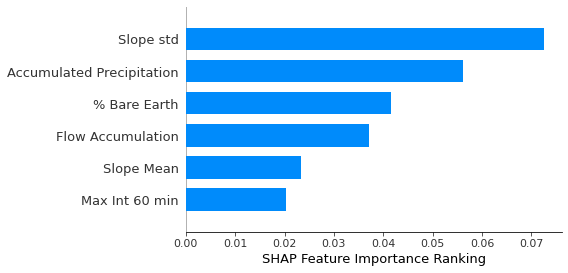

                     Feature  SHAP Importance
0                  Slope std         0.072499
1  Accumulated Precipitation         0.056226
2               % Bare Earth         0.041474
3          Flow Accumulation         0.037176
4                 Slope Mean         0.023305
5             Max Int 60 min         0.020264


In [3]:


# Evaluate the model with SHAP
feature_importance, ranking_plot = evaluate_model_with_shap(model, X_train, X_test)
# get feature labels
feature_labels = X.columns
print(feature_importance)
#for feature in feature_labels:
    # Create a pdp plot for each feature
    #feature_importance, ranking_plot = evaluate_feature_with_shap(model, X_train, X_test, feature)
    #plt.show()



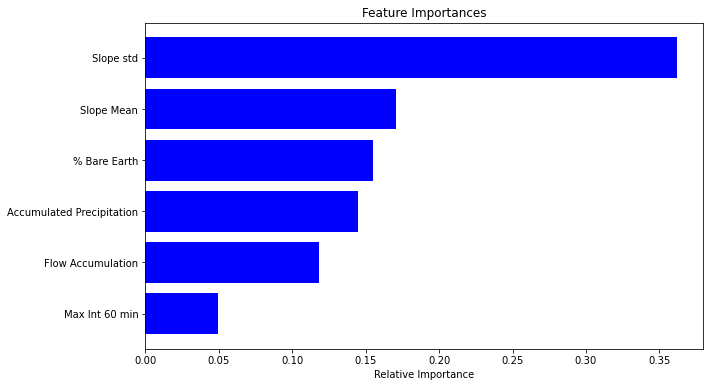

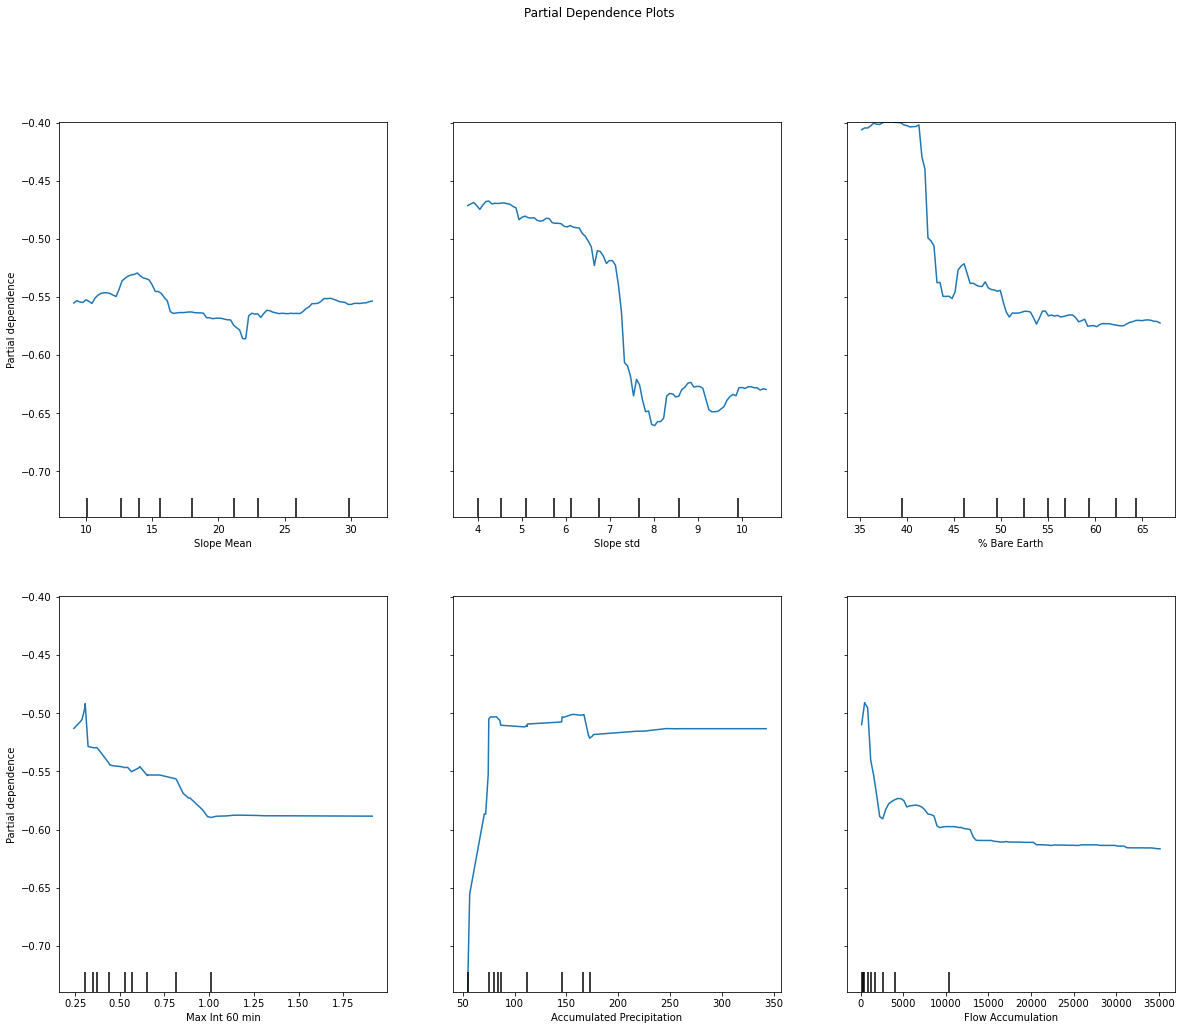

In [4]:
rfut.plot_feature_importances(model, X.columns)

feature_list = range(0, len(X.columns))
rfut.partial_dependence_plots(model, X_train, feature_list)

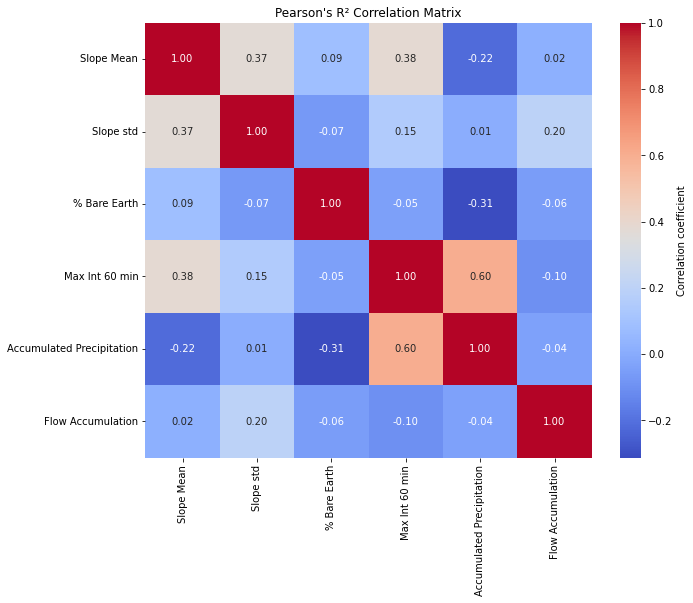

,Slope Mean,Slope std,% Bare Earth,Max Int 60 min,Accumulated Precipitation,Flow Accumulation
Slope Mean,1.000000,0.370162,0.086874,0.380217,-0.217250,0.016589
Slope std,0.370162,1.000000,-0.070437,0.150148,0.006141,0.197925
% Bare Earth,0.086874,-0.070437,1.000000,-0.045163,-0.313117,-0.056081
Max Int 60 min,0.380217,0.150148,-0.045163,1.000000,0.601902,-0.101413
Accumulated Precipitation,-0.217250,0.006141,-0.313117,0.601902,1.000000,-0.036893
Flow Accumulation,0.016589,0.197925,-0.056081,-0.101413,-0.036893,1.000000


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_matrix_table(features_df):
    """
    Calculate and display a correlation matrix with Pearson's R^2 for all features.

    Parameters:
    - features_df (pd.DataFrame): DataFrame containing all the features.

    Returns:
    - Displays a heatmap of the correlation matrix.
    """
    # Calculate the Pearson correlation matrix
    corr_matrix = features_df.corr()
    
    # Create a heatmap to visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
    plt.title("Pearson's R² Correlation Matrix")
    plt.show()

    return corr_matrix

correlation_matrix_table(X_train)

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def feature_impact_analysis(X, y, random_state=42):
    """
    Evaluate the impact of each feature on the RandomForestRegressor model performance.
    Both R^2 and MSE are calculated for each feature removal to assess impact.

    Args:
    X (DataFrame): The feature matrix.
    y (Series): The target variable.
    random_state (int): Seed for the random number generator for reproducibility.

    Returns:
    DataFrame: A DataFrame with each feature and the resulting R^2 and MSE when that feature is removed.
    """
    results = []
    original_features = X.columns.tolist()
    # Split the data to ensure fair evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    
    # Train a model with all features to establish baseline performance
    model = RandomForestRegressor(random_state=random_state)
    model.fit(X_train, y_train)
    baseline_r2 = model.score(X_test, y_test)
    predictions = model.predict(X_test)
    baseline_mse = mean_squared_error(y_test, predictions)
    
    # Iterate over each feature to be removed and retrain the model
    for feature in original_features:
        X_train_reduced = X_train.drop(columns=[feature])
        X_test_reduced = X_test.drop(columns=[feature])
        
        model = RandomForestRegressor(random_state=random_state)
        model.fit(X_train_reduced, y_train)
        reduced_predictions = model.predict(X_test_reduced)
        
        r2_score_reduced = model.score(X_test_reduced, y_test)
        mse_reduced = mean_squared_error(y_test, reduced_predictions)
        
        results.append({'Feature': feature,
                        'R^2 Score': r2_score_reduced,
                        'R^2 Drop': baseline_r2 - r2_score_reduced,
                        'MSE': mse_reduced,
                        'MSE Increase': mse_reduced - baseline_mse})
    
    return pd.DataFrame(results).sort_values(by='MSE Increase', ascending=False)

# Assuming X and y are defined as your feature set and target variable respectively
impact_df = feature_impact_analysis(X, y)
print(impact_df)


                     Feature  R^2 Score  R^2 Drop       MSE  MSE Increase
1                  Slope std   0.236758  0.092959  0.057208      0.006968
4  Accumulated Precipitation   0.257303  0.072415  0.055668      0.005428
5          Flow Accumulation   0.291652  0.038066  0.053093      0.002853
3             Max Int 60 min   0.322661  0.007056  0.050769      0.000529
0                 Slope Mean   0.354866 -0.025149  0.048355     -0.001885
2               % Bare Earth   0.463343 -0.133626  0.040224     -0.010016
